In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
athletes_data = pd.read_csv('2025_Problem_C_Data/summerOly_athletes.csv', encoding='latin1')
hosts_data = pd.read_csv('2025_Problem_C_Data/summerOly_hosts.csv', encoding='latin1')
medal_data = pd.read_csv('2025_Problem_C_Data/summerOly_medal_counts.csv', encoding='latin1')
programs_data = pd.read_csv('2025_Problem_C_Data/summerOly_programs.csv', encoding='latin1')

In [3]:
hosts_data[['City','Country']] = hosts_data.Host.str.split(",",expand=True) 

In [4]:
def get_medal_count_for_country(country):
    total_medals = []
    gold_medals = []
    years = []
    for row in medal_data.itertuples():
        year = row[7]
        if(row[2] != country):
            continue
        years.append(year)
        total_medals.append(row[6])
        gold_medals.append(row[2])
    return (total_medals, gold_medals, years)

In [5]:
def get_host_years_for_country(country):
    host_years = []
    for host in hosts_data.itertuples():
        if(country in host[2]):
            host_years.append(host[1])
    return host_years

Country: Mexico


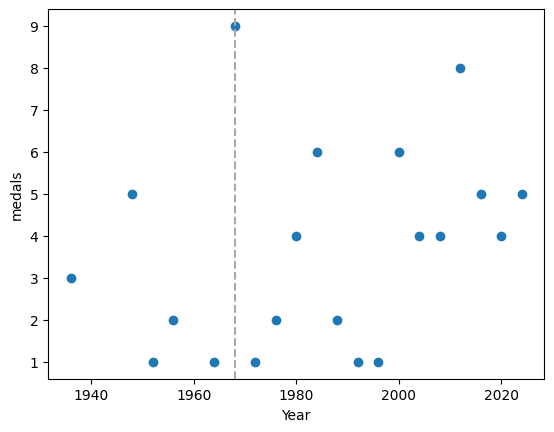

In [6]:
country = hosts_data.iloc[18]['Country'][2:]
print("Country:", country)

total_medals, gold_medals, years = get_medal_count_for_country(country)
host_years = get_host_years_for_country(country)

np_tot = np.asarray(total_medals)
np_gold = np.asarray(gold_medals)
np_years = np.asarray(years)

plt.scatter(np_years, np_tot)
plt.xlabel('Year')
plt.ylabel("medals")

for year in host_years:
    if(year <= 2024):
        plt.axvline(x=year, c='#a9a9a9', linestyle='--')

plt.show()

In [38]:
def host_medal_differences(medal_type):

    differences = []

    for _, row in hosts_data.iterrows():
        current_year = row['ï»¿Year']
        host = row['Country']

        if (host == None):
            continue
        else:
            host = host[2:]

        # Get the host's medal count for the current year
        curr_medals = medal_data.loc[(medal_data['Year'] == current_year) & (medal_data['NOC'] == host), medal_type]
        curr_medals = curr_medals.iloc[0] if not curr_medals.empty else 0
        
        # Get the host's medal count for the previous and next year
        prev_medals = medal_data.loc[(medal_data['Year'] == current_year - 4) & (medal_data['NOC'] == host), medal_type]        
        prev_medals = prev_medals.iloc[0] if not prev_medals.empty else curr_medals
    
        next_medals = medal_data.loc[(medal_data['Year'] == current_year + 4) & (medal_data['NOC'] == host), medal_type]        
        next_medals= next_medals.iloc[0] if not next_medals.empty else curr_medals

        # Calculate the average
        average_medals = (prev_medals + next_medals) / 2

        # Calculate and append the differences
        if prev_medals <= 0:
            difference = 1
        else: 
            difference = curr_medals / prev_medals 
        differences.append(difference)

        # print("Host:", host, "Year:", current_year, "Current:", curr_total, "Before:", prev_total, "After:", next_total, "Total Dif:", difference_total)

    return differences

In [39]:
differences = host_medal_differences("Gold")
print(differences)
sum = 0
n = 0
for dif in differences:
    sum += dif
    n+= 1

print(sum / n)

[np.float64(1.0), np.float64(5.4), np.float64(4.0), 1, np.float64(2.875), np.float64(1.0), np.float64(1.4444444444444444), np.float64(1.5), np.float64(0.0), np.float64(1.0), 1, np.float64(0.75), np.float64(2.1666666666666665), np.float64(0.0), np.float64(1.0), 1, np.float64(2.6), 1, np.float64(1.6326530612244898), np.float64(1.0), np.float64(2.0), np.float64(13.0), np.float64(1.1891891891891893), np.float64(1.7777777777777777), np.float64(1.5), np.float64(1.5), 1, np.float64(2.3333333333333335), 1, np.float64(1.6), np.float64(0.0), 1]
1.852158264769872


In [27]:
def t_test(data):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
    n = len(data)
    standard_error = sample_std / np.sqrt(n)

    # Step 2: Compute the t-statistic
    t_statistic = (sample_mean - 0) / standard_error

    # Step 3: Compute the one-tailed p-value
    p_value = 1 - stats.t.cdf(t_statistic, df=n-1)

    # Step 4: Compare to significance level
    alpha = 0.05
    if p_value < alpha:
        print(f"Reject the null hypothesis (p = {p_value:.4f}). The mean is significantly greater than 0.")
    else:
        print(f"Fail to reject the null hypothesis (p = {p_value:.4f}). No significant evidence the mean is greater than 0.")

    # Print the results
    print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

In [28]:
total_difs = host_medal_differences("Total")
gold_difs = host_medal_differences("Gold")
silver_difs = host_medal_differences("Silver")
bronze_difs = host_medal_differences("Bronze")

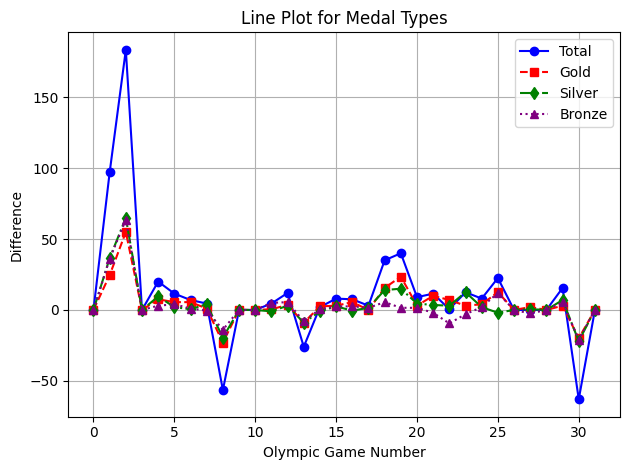

In [32]:
# Plot each array
plt.plot(total_difs, label='Total', color='blue', linestyle='-', marker='o')
plt.plot(gold_difs, label='Gold', color='red', linestyle='--', marker='s')
plt.plot(silver_difs, label='Silver', color='green', linestyle='-.', marker='d')
plt.plot(bronze_difs, label='Bronze', color='purple', linestyle=':', marker='^')

# Add labels, title, and legend
plt.xlabel('Olympic Game Number')
plt.ylabel('Difference')
plt.title('Line Plot for Medal Types')
plt.legend()  # Display the legend to differentiate the arrays

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Statistical tests
print("Total:")
t_test(total_difs)

print("Gold:")
t_test(gold_difs)

print("Silver:")
t_test(silver_difs)

print("Bronze:")
t_test(bronze_difs)

Total:
Fail to reject the null hypothesis (p = 0.0597). No significant evidence the mean is greater than 0.
t-statistic: 1.6017, p-value: 0.0597
Gold:
Reject the null hypothesis (p = 0.0290). The mean is significantly greater than 0.
t-statistic: 1.9682, p-value: 0.0290
Silver:
Fail to reject the null hypothesis (p = 0.0629). No significant evidence the mean is greater than 0.
t-statistic: 1.5732, p-value: 0.0629
Bronze:
Fail to reject the null hypothesis (p = 0.1278). No significant evidence the mean is greater than 0.
t-statistic: 1.1580, p-value: 0.1278
